# LightGBM（特徴量：MedInc）の予測値の可視化

In [1]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install scikit-learn==1.2.2
# !pip install lightgbm==3.3.5

In [2]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [3]:
# バージョンの確認
import matplotlib
import sklearn
import lightgbm as lgb
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(sklearn.__version__) 
print(lgb.__version__)

1.5.3
1.22.4
3.7.1
1.2.2
3.3.5


In [4]:
# データセットの読み込み
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
#df.head()

In [5]:
# 特徴量と目的変数の設定
X_train = df.loc[:99, ['MedInc']] # 特徴量に100件のMedInc（世帯所得）を設定
y_train = df.loc[:99, 'MedHouseVal'] # 正解値に100件のMedHouseVal（住宅価格）を設定
print('X_train:', X_train[:3])
print('y_train:', y_train[:3])

X_train:    MedInc
0  8.3252
1  8.3014
2  7.2574
y_train: 0    4.526
1    3.585
2    3.521
Name: MedHouseVal, dtype: float64


In [6]:
# ハイパーパラメータの設定
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)

params = {
    'objective': 'mse',
    'metric': 'mse',
    'learning_rate': 0.8,
    'max_depth': 1,
    'min_data_in_leaf': 1,
    'min_data_in_bin': 1,
    'max_bin': 100,
    'seed': 0,
    'verbose': -1,
}

In [7]:
# モデルの学習
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=1,
                  valid_sets=[lgb_train],
                  valid_names=['train'])

[1]	train's l2: 0.408727


In [8]:
# 学習データの予測と評価
y_train_pred = model.predict(X_train)
print('MSE train: %.2f' % (mean_squared_error(y_train, y_train_pred)))

MSE train: 0.41


In [9]:
# 予測値
model.predict(X_train)

array([2.39640403, 2.39640403, 2.39640403, 2.39640403, 2.39640403,
       2.39640403, 2.39640403, 2.39640403, 1.35011363, 2.39640403,
       2.39640403, 2.39640403, 2.39640403, 1.35011363, 1.35011363,
       1.35011363, 1.35011363, 1.35011363, 1.35011363, 1.35011363,
       1.35011363, 1.35011363, 1.35011363, 1.35011363, 1.35011363,
       1.35011363, 1.35011363, 1.35011363, 1.35011363, 1.35011363,
       1.35011363, 1.35011363, 1.35011363, 1.35011363, 1.35011363,
       1.35011363, 1.35011363, 1.35011363, 2.39640403, 1.35011363,
       1.35011363, 1.35011363, 1.35011363, 2.39640403, 1.35011363,
       1.35011363, 1.35011363, 1.35011363, 1.35011363, 1.35011363,
       1.35011363, 1.35011363, 1.35011363, 1.35011363, 1.35011363,
       1.35011363, 1.35011363, 1.35011363, 1.35011363, 1.35011363,
       2.39640403, 2.39640403, 1.35011363, 1.35011363, 1.35011363,
       1.35011363, 1.35011363, 1.35011363, 1.35011363, 1.35011363,
       1.35011363, 1.35011363, 1.35011363, 1.35011363, 1.35011

<Axes: >

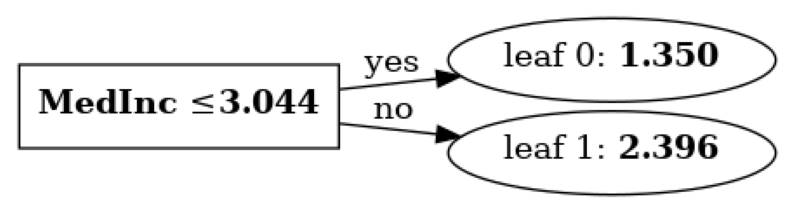

In [10]:
# 木の可視化
lgb.plot_tree(model, tree_index=0, figsize=(10, 10))

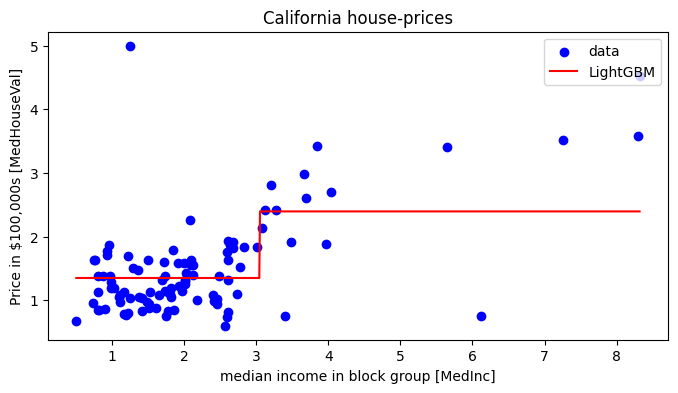

In [11]:
# データと予測値の可視化
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
X = X_train.values.flatten() # numpy配列に変換し、1次元配列に変換
y = y_train.values # numpy配列に変換

# Xの最小値から最大値まで0.01刻みのX_pltを作成し、2次元配列に変換
X_plt = pd.DataFrame({'MedInc': np.arange(X.min(), X.max(), 0.01)})
y_pred = model.predict(X_plt) # 住宅価格を予測

# 学習データ(世帯所得と住宅価格)の散布図と予測値のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red', label='LightGBM')
plt.ylabel('Price in $100,000s [MedHouseVal]')
plt.xlabel('median income in block group [MedInc]')
plt.title('California house-prices')
plt.legend(loc='upper right')
plt.show()

# 分割点と予測値の検証

In [12]:
# 初期値
print('samples:', len(y)) # レコード数
pred0 = sum(y)/len(y) # 予測値（平均）
print('pred0:', pred0)

samples: 100
pred0: 1.5175200999999998


In [13]:
# 左葉のレコード
threshold = 3.044 # 左右に分割する分割点
X_left = X[X<=threshold] # 左葉の特徴量
y_left = y[X<=threshold] # 左葉の正解値
print('X_left:', X_left)
print('')
print('y_left:', y_left)

X_left: [2.0804 2.6736 1.9167 2.125  2.775  2.1202 1.9911 2.6033 1.3578 1.7135
 1.725  2.1806 2.6    2.4038 2.4597 1.808  1.6424 1.6875 1.9274 1.9615
 1.7969 1.375  2.7303 1.4861 1.0972 1.4103 2.5898 2.0978 1.2852 1.025
 3.0125 2.6768 2.026  1.7348 0.9506 1.775  0.9218 1.5045 1.1108 1.2475
 1.6098 1.4113 1.5057 0.8172 1.2171 2.5625 0.9011 1.191  2.5938 1.1667
 0.8056 2.6094 1.8516 0.9802 1.7719 0.7286 1.75   0.4999 2.483  0.9241
 2.4464 1.1111 0.8026 2.0114 1.5    1.1667 1.5208 0.8075 1.8088 2.4083
 0.977  0.76   0.9722 1.2434 2.0938 0.8668 0.75   2.6354 1.8477 2.0096
 2.8345 2.0062 1.2185 2.6104]

y_left: [2.267   1.913   1.592   1.4     1.525   1.555   1.587   1.629   1.475
 1.598   1.139   0.997   1.326   1.075   0.938   1.055   1.089   1.32
 1.223   1.152   1.104   1.049   1.097   0.972   1.045   1.039   1.76
 1.554   1.5     1.188   1.844   1.823   1.425   1.375   1.875   1.125
 1.719   0.938   0.975   1.042   0.875   0.831   0.875   0.853   0.803
 0.6     0.861   0.761   0.735   

In [14]:
# 左葉の予測値
print('samples_left:', len(y_left)) # 左葉のレコード数
residual_left = y_left - pred0 # 残差
weight_left = sum(residual_left)/len(y_left) # 重み
print('weight_left:', weight_left)
y_pred_left = pred0 + 0.8 * weight_left # 左葉の予測値
print('y_pred_left:', y_pred_left)

samples_left: 84
weight_left: -0.2092580761904759
y_pred_left: 1.3501136390476192


In [15]:
# 右葉のレコード
X_right = X[threshold<X] # 右葉の特徴量
y_right = y[threshold<X] # 右葉の正解値
print('X_right:', X_right)
print('y_right:', y_right)

X_right: [8.3252 8.3014 7.2574 5.6431 3.8462 4.0368 3.6591 3.12   3.6912 3.2031
 3.2705 3.075  3.48   3.9643 3.3929 6.1183]
y_right: [4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.611 2.815 2.418 2.135
 1.914 1.888 0.757 0.75 ]


In [16]:
# 右葉の予測値
print('samples_right:', len(y_right)) # 右葉のレコード数
residual_right = y_right - pred0 # 残差
weight_right = sum(residual_right)/len(y_right) # 重み
print('weight_right:', weight_right)
y_pred_right = pred0 + 0.8 * weight_right # 右葉の予測値
print('y_pred_right:', y_pred_right)

samples_right: 16
weight_right: 1.0986049000000002
y_pred_right: 2.3964040200000003


# 特徴量MedIncのヒストグラム(5.4節のLightGBMの説明で掲載)

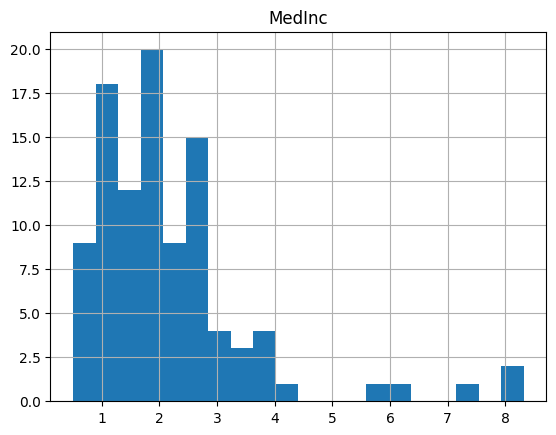

In [17]:
# max_bin=20
X_train = df.loc[:99, ['MedInc']] # 特徴量に100件のMedInc（世帯所得）を設定
X_train.hist(bins=20) # 100件レコードに対してbinが20のヒストグラム
plt.show()

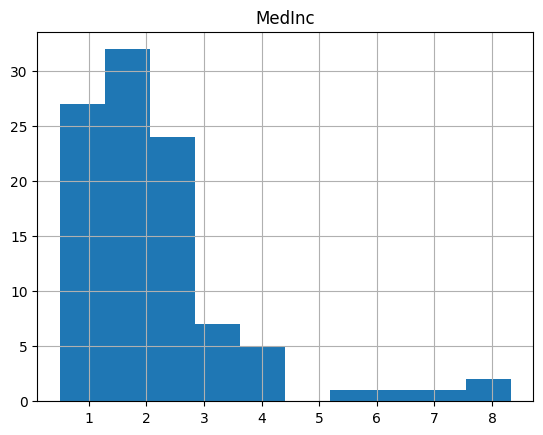

In [18]:
# max_bin=10
X_train.hist(bins=10) # 100件レコードに対してbinが10のヒストグラム
plt.show()